In [1]:
import numpy as np
import matplotlib.pyplot as plt
from optix import *

In [4]:
def draw_system(op: OpticalPath, gauss_in: GaussianBeam) -> plt.Figure:
    fig, ax = plt.subplots()
    
    elements = op.childs
    op = OpticalPath()
    z_prev = 0
    for element in elements:
        op.append(element)
        if op.length > z_prev:
            gauss_temp = op.propagate(gauss_in)
            z = np.linspace(z_prev, op.length, 100)
            w = gauss_temp.beam_radius(z)
            ax.plot(z*10**3, w*10**3, label=element.name)
            ax.axvline(op.length*10**3, linewidth=1, color="black")
            z_prev = op.length

    
    ax.set_xlabel("Distance [mm]")
    ax.set_ylabel("W [mm]")
    return fig

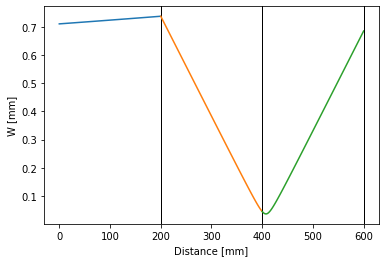

In [5]:
gauss_in = GaussianBeam(400e-9, waist_location=-1.8920134617362646, w0=0.0005735249617421162)
op = OpticalPath()
op.append(FreeSpace(0.2))
op.append(ThinLens(0.2))
op.append(FreeSpace(0.2))
op.append(FreeSpace(0.2))
fig = draw_system(op, gauss_in)
